In [1]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices  #stats dependency

In [2]:
df = sm.datasets.get_rdataset('Guerry', 'HistData').data

In [3]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
#select the variables of interest and look at the bottom 5 rows:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [5]:
#Notice that there is one missing observation in the Region column. 
#We eliminate it using a DataFrame method provided by pandas:

df = df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


#### Substantive motivation and model
We want to know whether literacy rates in the 86 French departments are associated with per capita wagers on the Royal Lottery in the 1820s. We need to control for the level of wealth in each department, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects. The model is estimated using ordinary least squares regression (OLS).

#### Design matrices (endog & exog)
To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). The OLS coefficient estimates are calculated as usual:
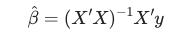
where y is an N x 1 column of data on lottery wagers per capita (Lottery). X is N x 7 with an intercept, the Literacy and Wealth variables, and 4 region binary variables.

The patsy module provides a convenient function to prepare design matrices using R-like formulas. You can find more information here.

In [6]:
# We use patsy’s dmatrices function to create design matrices:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [14]:
y, X
y[:3]
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


Notice that dmatrices has

split the categorical Region variable into a set of indicator variables.

added a constant to the exogenous regressors matrix.

returned pandas DataFrames instead of simple numpy arrays. This is useful because DataFrames allow statsmodels to carry-over meta-data (e.g. variable names) when reporting results.

The above behavior can of course be altered. See the patsy doc pages.

### Model fit and summary

Fitting a model in statsmodels typically involves 3 easy steps:

1. Use the model class to describe the model
2. Fit the model using a class method
3. Inspect the results using a summary method

In [8]:
# For OLS, this is achieved by:

In [9]:
mod = sm.OLS(y, X)    # describe mdoel
res = mod.fit()       # fit model
print(res.summary())  # summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.07e-05
Time:                        14:38:06   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [10]:
#The res object has many useful attributes. For example, we can extract parameter estimates and r-squared by typing:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [11]:
# The res object has many useful attributes. For example, we can extract parameter estimates and r-squared by typing:
res.rsquared

0.337950869192882

In [12]:
# Type dir(res) for a full list of attributes
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

### Diagnostics and specification tests¶
statsmodels allows you to conduct a range of useful regression diagnostics and specification tests. For instance, apply the Rainbow test for linearity (the null hypothesis is that the relationship is properly modelled as linear):

In [16]:
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

In [17]:
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

Admittedly, the output produced above is not very verbose, but we know from reading the docstring (also, print(sm.stats.linear_rainbow.__doc__)) that the first number is an F-statistic and that the second is the p-value.

statsmodels also provides graphics functions. For example, we can draw a plot of partial regression for a set of regressors by:

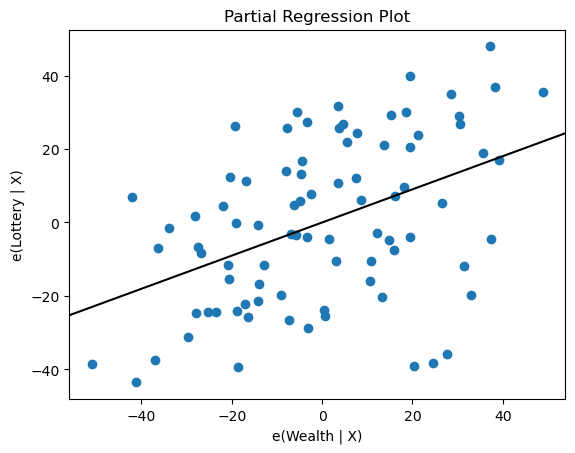

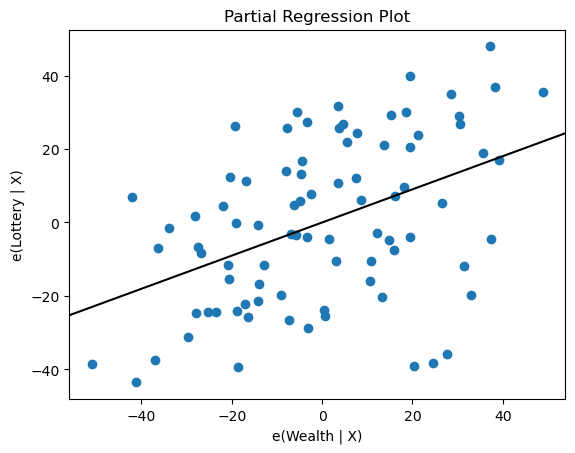

In [18]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], 
                             data=df, obs_labels=False)